In [1]:
import pandas as pd
import numpy as np

In [2]:
def one_hot_encoding(n, length):
    one_hot = [0] * length
    one_hot[n] = 1
    
    return one_hot

In [3]:
def rand_shuffle(data, label):

    s = np.arange(data.shape[0])
    np.random.shuffle(s)

    return data[s], label[s]

In [27]:
def make_valid(data, label):
    pivot = round(data.shape[0] * 0.9)
    train_data = data[:pivot]
    train_label = label[:pivot]
    
    test_data = data[pivot:]
    test_label = label[pivot:]
    
    return train_data, train_label, test_data, test_label

In [5]:
import glob # 파일의 경로명을 이용하여 파일들의 리스트를 뽑을 때 사용
import numpy as np

nbin = 40
nframe = 2000

In [13]:
# None Peapole

x_train = []
x_train1 = []
x_label = []

path = r'D:\study\DB\UWB\NonePeople'

filenames = glob.glob(path + '\\'+ "*.txt")

for filename in filenames:

    f = open(filename, 'r', errors='ignore')
    lines = f.readlines()
    line = []
    line1 = []
    for i, d in enumerate(lines):
        tmp = lines[i].split(' ')
        
        line.extend(tmp)
        
        if i % 4 == 3:
            x_train.append(line)
            line = []
            
    x_train1.append(x_train)
    x_label.append(one_hot_encoding(0, 2))
    x_train = []
    
x_train1 = np.array(x_train1, dtype='float32')
x_label = np.array(x_label, dtype='float32')
np.shape(x_train1)

(1676, 2000, 40)

In [14]:
# One Peapole

y_train = []
y_train1 = []
y_label = []

path = r'D:\study\DB\UWB\People\OnePeople'
    
filenames = glob.glob(path + '\\'+ "*.txt")

for filename in filenames:

    f = open(filename, 'r', errors='ignore')
    lines = f.readlines()
    line = []
    line1 = []
    for i, d in enumerate(lines):
        tmp = lines[i].split(' ')

        line.extend(tmp)

        if i % 4 == 3:
            y_train.append(line)
            line = []

    y_train1.append(y_train)
    y_label.append(one_hot_encoding(1, 2))
    y_train = []

y_train1 = np.array(y_train1, dtype='float32')
y_label = np.array(y_label, dtype='float32')
np.shape(y_train1)

(944, 2000, 40)

In [15]:
# More Peapole

z_train = []
z_train1 = []
z_label = []

path = r'D:\study\DB\UWB\People\MorePeople'

filenames = glob.glob(path + '\\'+ "*.txt")

for filename in filenames:

    f = open(filename, 'r', errors='ignore')
    lines = f.readlines()
    line = []
    line1 = []
    for i, d in enumerate(lines):
        tmp = lines[i].split(' ')
        
        line.extend(tmp)
        
        if i % 4 == 3:
            z_train.append(line)
            line = []
            
    z_train1.append(z_train)
    z_label.append(one_hot_encoding(1, 2))
    z_train = []
    
z_train1 = np.array(z_train1, dtype='float32')
z_label = np.array(z_label, dtype='float32')
np.shape(z_train1)

(925, 2000, 40)

In [149]:
x_train1, x_label = rand_shuffle(x_train1, x_label)
x_train_data, x_train_label, x_test_data, x_test_label = make_valid(x_train1, x_label)

In [150]:
y_train1, y_label = rand_shuffle(y_train1, y_label)
y_train_data, y_train_label, y_test_data, y_test_label = make_valid(y_train1, y_label)

In [151]:
z_train1, z_label = rand_shuffle(z_train1, z_label)
z_train_data, z_train_label, z_test_data, z_test_label = make_valid(z_train1, z_label)

In [152]:
train_data = np.concatenate((x_train_data, y_train_data, z_train_data), axis = 0)
ndata = train_data.shape[0]

train_data = train_data.reshape(ndata,nframe,nbin,1)
train_data = train_data/2000
train_label = np.concatenate((x_train_label, y_train_label, z_train_label), axis = 0)

train_data.shape

(3190, 2000, 40, 1)

In [153]:
x_test_data = x_test_data.reshape(x_test_data.shape[0],nframe,nbin,1)
y_test_data = y_test_data.reshape(y_test_data.shape[0],nframe,nbin,1)
z_test_data = z_test_data.reshape(z_test_data.shape[0],nframe,nbin,1)

In [154]:
test_data = np.concatenate((x_test_data, y_test_data, z_test_data), axis = 0)
te_data = test_data.shape[0]

test_data = test_data.reshape(te_data,nframe,nbin,1)
test_data = test_data/2000
test_label = np.concatenate((x_test_label, y_test_label, z_test_label), axis = 0)

test_data.shape

(355, 2000, 40, 1)

In [155]:
train_data, train_label = rand_shuffle(train_data, train_label)

In [168]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters=4, kernel_size = 3, padding = 'same', activation='relu', input_shape=(2000, 40, 1)))
model.add(layers.Conv2D(filters=8, kernel_size = 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=8, kernel_size = 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=16, kernel_size = 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 2000, 40, 4)       40        
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 2000, 40, 8)       296       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1000, 20, 8)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 1000, 20, 8)       584       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 1000, 20, 16)      1168      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 500, 10, 16)       0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 500, 10, 16)     

In [169]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, 
                    train_label,
                    validation_split = 0.1,
                    shuffle=True,
                    epochs=10,
                    batch_size=10)

Epoch 1/10
288/288 [==============================] - 63s 218ms/step - loss: 0.5025 - accuracy: 0.7517 - val_loss: 0.3291 - val_accuracy: 0.8589
Epoch 2/10
288/288 [==============================] - 62s 215ms/step - loss: 0.3557 - accuracy: 0.8617 - val_loss: 0.3012 - val_accuracy: 0.8746
Epoch 3/10
288/288 [==============================] - 61s 212ms/step - loss: 0.2807 - accuracy: 0.8913 - val_loss: 0.5118 - val_accuracy: 0.8433
Epoch 4/10
288/288 [==============================] - 63s 218ms/step - loss: 0.2504 - accuracy: 0.9053 - val_loss: 0.2997 - val_accuracy: 0.8997
Epoch 5/10
288/288 [==============================] - 63s 219ms/step - loss: 0.2078 - accuracy: 0.9272 - val_loss: 0.2504 - val_accuracy: 0.9216
Epoch 6/10
288/288 [==============================] - 64s 223ms/step - loss: 0.1544 - accuracy: 0.9450 - val_loss: 0.2902 - val_accuracy: 0.9091
Epoch 7/10
288/288 [==============================] - 63s 219ms/step - loss: 0.1175 - accuracy: 0.9606 - val_loss: 0.3931 - val_ac

In [167]:
results = model.evaluate(x_test_data, x_test_label)
print('NonePeopel => ', results)
results = model.evaluate(y_test_data, y_test_label)
print('OnePeopel => ', results)
results = model.evaluate(z_test_data, z_test_label)
print('MorePeopel => ', results)

print()
results = model.evaluate(test_data, test_label)
print('Total => ', results)

6/6 [==============================] - 1s 100ms/step - loss: 52974.7617 - accuracy: 0.0298
NonePeopel =>  [52974.76171875, 0.02976190485060215]
3/3 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000
OnePeopel =>  [0.0, 1.0]
3/3 [==============================] - 0s 88ms/step - loss: 18.1963 - accuracy: 0.9892
MorePeopel =>  [18.196300506591797, 0.9892473220825195]

12/12 [==============================] - 1s 122ms/step - loss: 0.5649 - accuracy: 0.8648
Total =>  [0.5648602843284607, 0.8647887110710144]


In [ ]:
tflite_model_name = 'UWBedge_model_ver1'
model.save(tflite_model_name + '.h5')
model.save(tflite_model_name + '.keras')

In [32]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('UWBedge_model_ver1' +'.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\S1SECOM\AppData\Local\Temp\tmppfrzrd9e\assets


INFO:tensorflow:Assets written to: C:\Users\S1SECOM\AppData\Local\Temp\tmppfrzrd9e\assets


20486016

In [346]:
predictions = model.predict_classes(t_train1)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [136]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

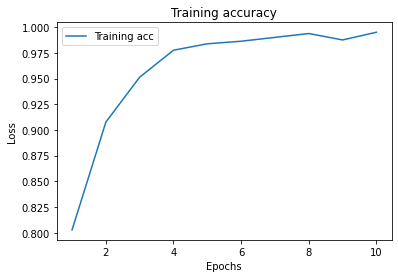

In [264]:
import matplotlib.pyplot as plt

plt.clf()
acc_values = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, acc_values, label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

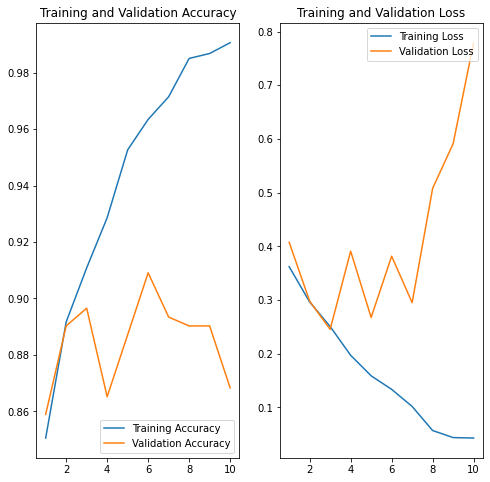

In [137]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()